# Rebound format test

In [1]:
import rebound
import mpcorbfile
import numpy as np

sim=rebound.Simulation()
rebound.data.add_solar_system(sim)


In [2]:
# Cargar el archivo MPCORB.DAT
archivo_mpcorb = 'MPCORB_TEST.DAT'
f = mpcorbfile.mpcorb_file(archivo_mpcorb)


In [3]:
f.bodies[0]

{'Principal_desig': 'a7943',
 'G': 24.19,
 'H': 0.15,
 'epoch': 'K2555',
 'M': 184.7538,
 'Peri': 195.63684,
 'Node': 146.91033,
 'i': 11.6102,
 'e': 0.0894684,
 'n': 1.13494811,
 'a': 0.9102319,
 'U': '2',
 'Reference': 'E2024-JU2',
 'Num_obs': 1055,
 'Num_opps': 2,
 'Arc length': '2012-2013',
 'rms': 0.36,
 'Perturbers': 'M-v',
 'Perturbers_2': '3Ek',
 'Computer': 'Veres',
 'Hex_flags': '0801',
 'Number': '(367943)',
 'name': 'Duende',
 'Last_obs': '20130221',
 'epochJD': 2460800.5,
 'designation': '367943',
 'discover_date': None,
 'orbit_type': 'NEO;Athen'}

## mpcorbfile has a convenient fn to add asteroids to as simulation

In [4]:
#Only first 10 asteroids
mpcorbfile.add_asteroids_to_rebound(sim,bodies=f.bodies[0:10])
#All asteroids
#f.add_asteroids_to_rebound(sim)

In [5]:
#sim.integrator='whfast'
sim.status(showAllFields=True)

---------------------------------
REBOUND version:     	4.4.6
REBOUND built on:    	Dec 30 2024 23:43:16
Number of particles: 	19
Selected integrator: 	ias15
Simulation time:     	0.0000000000000000e+00
Current timestep:    	0.001000
---------------------------------
<rebound.particle.Particle object at 0x76b5241f9ad0, m=1.0 x=-0.005837616616786662 y=0.006600361081881469 z=8.090699630593683e-05 vx=-0.00043778026915688127 vy=-0.0002768834056732778 vz=1.289781032896905e-05>
<rebound.particle.Particle object at 0x76b5241f91d0, m=1.6601141530543e-07 x=-0.29485531126658365 y=-0.3433423322595738 z=-0.0020026458683662014 vx=0.9289643225822997 vy=-0.9659457911951687 vz=-0.16415293821738913>
<rebound.particle.Particle object at 0x76b5241f9ad0, m=2.44783828778477e-06 x=0.47227261050357944 y=0.5481920502357726 z=-0.020076801470085514 vx=-0.8855348179427942 vy=0.7727916469867526 vz=0.06169738346121213>
<rebound.particle.Particle object at 0x76b5241f91d0, m=3.04043264802264e-06 x=0.9754193642876818

In [6]:
for orbit in sim.orbits():
    print(orbit)

<rebound.Orbit instance, a=0.38709873488039565 e=0.20563425743114355 inc=0.1222376145886529 Omega=0.8430838381492695 omega=0.5093941264318138 f=2.66985638111655>
<rebound.Orbit instance, a=0.7233231806491239 e=0.006789378655887465 inc=0.059246163609261916 Omega=1.3373251998759481 omega=0.9629526117449929 f=4.829751018157969>
<rebound.Orbit instance, a=1.0000001983666864 e=0.016711159827985017 inc=4.6953426513209986e-05 Omega=3.0804552590548058 omega=5.000799929638195 f=4.258050047659895>
<rebound.Orbit instance, a=1.5236188858422628 e=0.09335870466461238 inc=0.03225220589056631 Omega=0.8638493743951475 omega=5.0022278304877945 f=0.40941884688157604>
<rebound.Orbit instance, a=5.203770080632829 e=0.04863902473779274 inc=0.022751678453263476 Omega=1.7543456825123547 omega=4.771887521263915 f=4.938993957255633>
<rebound.Orbit instance, a=9.539684939565669 e=0.05489760052159024 inc=0.04342249633050542 Omega=1.9827291270345913 omega=5.917899089011026 f=3.616800414342635>
<rebound.Orbit inst

In [7]:
#sim.widget(size=(400,400))

In [8]:
f.colnames

['Principal_desig',
 'G',
 'H',
 'epoch',
 'M',
 'Peri',
 'Node',
 'i',
 'e',
 'n',
 'a',
 'U',
 'Reference',
 'Num_obs',
 'Num_opps',
 'Arc length',
 'rms',
 'Perturbers',
 'Perturbers_2',
 'Computer',
 'Hex_flags',
 'Number',
 'name',
 'Last_obs',
 'epochJD',
 'designation',
 'discover_date',
 'orbit_type']

In [9]:
#tiempo estimado en horas para calcular una año
#toda la base de datos con 32 cores
(1500000/(1000/(4*60)))/3600/32

3.125

In [10]:
s=sim
sim.integrator = "whfast"
%timeit
sim.integrate(-0.001)
%timeit
sim.status(showAllFields=True)

---------------------------------
REBOUND version:     	4.4.6
REBOUND built on:    	Dec 30 2024 23:43:16
Number of particles: 	19
Selected integrator: 	whfast
Simulation time:     	-1.0000000000000000e-03
Current timestep:    	-0.001000
---------------------------------
<rebound.particle.Particle object at 0x76b5241fb150, m=1.0 x=-0.005837178824704646 y=0.006600637949040866 z=8.089409830233754e-05 vx=-0.0004378038948276794 vy=-0.0002768509117490171 vz=1.2898196875534082e-05>
<rebound.particle.Particle object at 0x76b5241fb450, m=1.6601141530543e-07 x=-0.2957827277581057 y=-0.34237451611561304 z=-0.0018384820766825889 vx=0.9258664802271479 vy=-0.9696854052963347 vz=-0.16417435596621532>
<rebound.particle.Particle object at 0x76b5241fb150, m=2.44783828778477e-06 x=0.4731575116640523 y=0.5474185415547899 z=-0.02013847212671882 vx=-0.8842671194574143 vy=0.77422536548114 vz=0.06164390287627055>
<rebound.particle.Particle object at 0x76b5241fb450, m=3.04043264802264e-06 x=0.9752104562974715 

In [11]:
for orbit in sim.orbits():
    print(orbit)

<rebound.Orbit instance, a=0.38709873406594103 e=0.2056342592398552 inc=0.12223761484344615 Omega=0.843083838224904 omega=0.50939411842353 f=2.6668996126999094>
<rebound.Orbit instance, a=0.7233231749527597 e=0.006789373578352251 inc=0.05924616370198127 Omega=1.3373251990380874 omega=0.9629536835746011 f=4.828121710614439>
<rebound.Orbit instance, a=1.0000002203576208 e=0.016711152908861805 inc=4.695320188330009e-05 Omega=3.080456063304129 omega=5.00079785845695 f=4.257065528086359>
<rebound.Orbit instance, a=1.5236189581891006 e=0.09335875132104032 inc=0.03225220507517767 Omega=0.8638494044803751 omega=5.0022277789717275 f=0.40878386952795864>
<rebound.Orbit instance, a=5.203770063665339 e=0.04863904354963696 inc=0.02275167858396886 Omega=1.7543456842021852 omega=4.771887717402741 f=4.938907319809445>
<rebound.Orbit instance, a=9.53968501797442 e=0.05489756075794991 inc=0.043422495859426945 Omega=1.9827291258370494 omega=5.917900020873617 f=3.6167686187295556>
<rebound.Orbit instance,

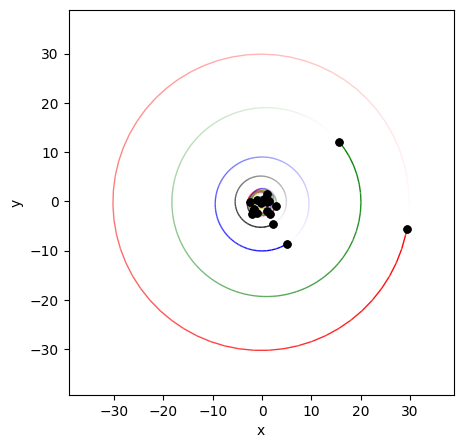

In [12]:
rebound.OrbitPlot(sim,color=True,)

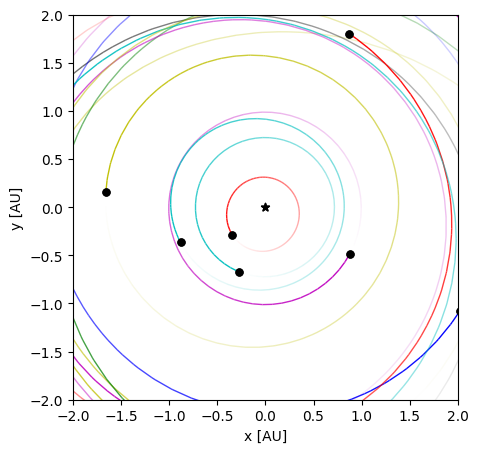

In [14]:
from IPython.display import display, clear_output
import matplotlib.pyplot as plt
sim.move_to_com()
for i in range(30):
    sim.integrate(sim.t+0.1)
    fig= rebound.OrbitPlot(sim,color=True,unitlabel="[AU]",xlim=[-2,2.],ylim=[-2,2.]).fig
    display(fig)
    plt.close(fig)
    clear_output(wait=True)